In [3]:
import numpy as np
from math import sqrt 
import pandas as pd
import random 
import matplotlib.pyplot as plt
import warnings 
from matplotlib import style
from collections import Counter 
import operator
from scipy import spatial
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
from sklearn.preprocessing import StandardScaler

# KNN algorithm 

In [4]:
def knn(data,predict,k):
    if len(data)> k:
        warnings.warn('K is set to a valeu less than total voting groups!')
    distances = []
    for group in data: 
        for features in data[group]:
            #euclidian distance sqrt((features[0]-predict[0])**2 + (features[1] - predict[1])**2)
            euclidian_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidian_distance,group])
    
    votes = [i[1] for i in sorted(distances)[:k]]
    #print (Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    
    confidence = Counter(votes).most_common(1)[0][1]/ k
    
    return vote_result,confidence


# First Example

In [5]:
style.use('fivethirtyeight')

In [6]:
dataset = {'k': [[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_point = [5,7]

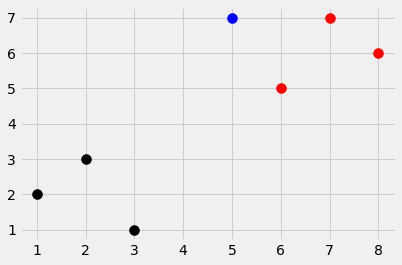

In [7]:
for i in dataset:
    for j in dataset[i]:
        plt.scatter(j[0],j[1], s=100,color=i) 
plt.scatter(new_point[0],new_point[1], s=100, color = "blue")
plt.show()

('r', 1.0)


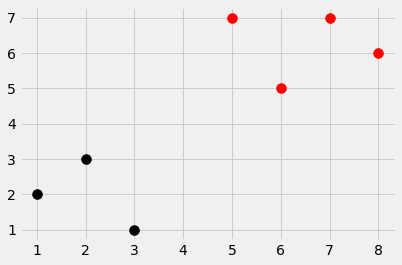

In [8]:
result = knn(dataset,new_point, k=3)
print(result)

for i in dataset:
    for j in dataset[i]:
        plt.scatter(j[0],j[1], s=100,color=i) 
plt.scatter(new_point[0],new_point[1], s=100, color = result[0])
plt.show()

# Cancer DataSet

In [9]:
accuracies = []

In [10]:
for i in range(5):
    df = pd.read_csv("breast-cancer-wisconsin.data.txt")
    df.replace('?', -99999, inplace = True)
    df.drop(['id'],1,inplace=True)


    full_data = df.astype(float).values.tolist()
    random.shuffle(full_data)



    test_size = 0.4
    train_set = {2:[],4:[]}
    test_set = {2:[],4:[]}
    train_data = full_data[:-int(test_size*len(full_data))]
    test_data = full_data[-int(test_size*len(full_data)):]

    for i in train_data:
        train_set[i[-1]].append(i[:-1])
    for i in test_data:
        test_set[i[-1]].append(i[:-1])


    correct = 0
    total = 0

    for group in test_set:
        for data in test_set[group]:
            vote,confidence = knn(train_set,data,k=5)
            if group == vote:
                correct += 1

            total +=1

    accuracies.append(correct/total)

print(sum(accuracies)/len(accuracies))

0.9663082437275985


# Movies DataSet

In [15]:
movies='KNN_movies/movies.csv'
ratings='KNN_movies/ratings.csv'

df_movies=pd.read_csv(movies, usecols=['movieId','title'], dtype={'movieId':'int32','title':'str'})
df_ratings=pd.read_csv(ratings, usecols=['userId','movieId','rating'],dtype={'userId':'int32','movieId':'int32','rating':'float32'})

In [16]:
#Spare Matrix
#         Users
#        [4,4,5] A
#Movies  [3,3,4] B ==   Cos(A,B) => 0.95 
#       [3,2,1]

movies_users=df_ratings.pivot(index='movieId', columns='userId',values='rating').fillna(0)
mat_movies_users=csr_matrix(movies_users.values)


In [17]:

# Euclidean Distance
# Manhattan Distance
# Minkowski Distance 
# Cosine Similarity
model_knn= NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)



In [18]:


model_knn.fit(mat_movies_users)



NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                 radius=1.0)

In [19]:
# Recommender(movie_name) => List of Movies recommended

def recommender(movie_name, data,model, n_recommendations ):
    model.fit(data)
    idx=process.extractOne(movie_name, df_movies['title'])[2]
    print('Movie Selected: ',df_movies['title'][idx], 'Index: ',idx)
    print('Searching for recommendations.....')
    distances, indices=model.kneighbors(data[idx], n_neighbors=n_recommendations)
    for i in indices:
        print(df_movies['title'][i].where(i!=idx))
    
recommender('iron man', mat_movies_users, model_knn,20)

Movie Selected:  Iron Man (2008) Index:  6743
Searching for recommendations.....
6743                                            NaN
7197                                  Garage (2007)
7195                        Merry Madagascar (2009)
7354                             A-Team, The (2010)
6726                         Superhero Movie (2008)
7137                         Thirst (Bakjwi) (2009)
7026                                 Scorpio (1973)
7571                                 Win Win (2011)
3880                  Look Who's Talking Now (1993)
6388    After the Wedding (Efter brylluppet) (2006)
7601                       Idiots and Angels (2008)
6755                Nina's Heavenly Delights (2006)
7022                                   Earth (2007)
7338                          Blue Valentine (2010)
4421                         What's Up, Doc? (1972)
6195                             Silent Hill (2006)
5885                                   Crash (2004)
3740                              M